In [ ]:
#Code
#Hierarchical Agglomerative Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn import metrics
import scipy.cluster.hierarchy as shc
%matplotlib inline


In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv')
data.head(10)


,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
5,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
6,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
7,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,2.64,1.7,1.68,1.69,1.71,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
8,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
9,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,2.63,1.69,1.67,1.67,1.70,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
data.shape

(5456, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
#the below string bad formatting, so changed it to 0
data.loc[2712,['Category 12']] = 0
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5456 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
#the below string bad formatting, so changed it to 0
data.loc[2712,['Category 11']] = 0
#changed dtype from obj to float
data['Category 11'] = pd.to_numeric(data['Category 11'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   float64
 12  Category 12  5456 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   float64
 12  Category 12  5456 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
#check for missing value
data.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       0
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [ ]:
data['Category 24'] = data['Category 24'].replace(np.NaN, data['Category 24'].mean())
data.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       0
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       0
Unnamed: 25    5454
dtype: int64

In [ ]:
data.drop(['Unnamed: 25'],axis=1,inplace=True)
#tmp_df = data.copy()
data.drop(['User',],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   float64
 11  Category 12  5456 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  Catego

In [ ]:
#missing value handling
#null detector

is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24


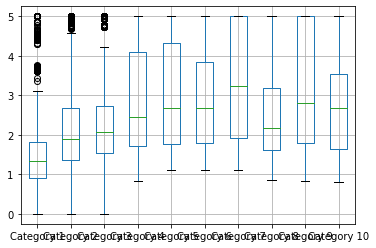

In [ ]:
data.boxplot(column=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9','Category 10'])



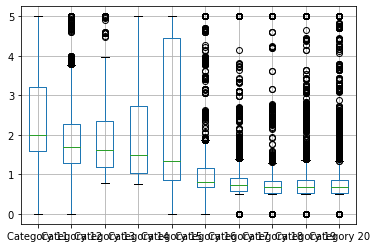

In [ ]:
data.boxplot(column=['Category 11', 'Category 12', 'Category 13', 'Category 14', 'Category 15', 'Category 16', 'Category 17', 'Category 18', 'Category 19','Category 20'])


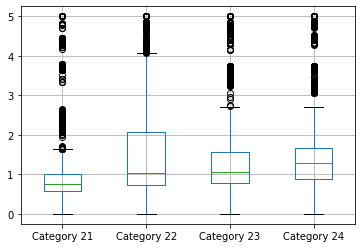

In [ ]:
data.boxplot(column=['Category 21', 'Category 22', 'Category 23', 'Category 24'])

In [ ]:
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.549604,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.382074,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171649
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.000000,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# Scale the data and normalize
#
sc = StandardScaler()
data_scaled = sc.fit_transform(data)
data_normalized = normalize(data_scaled)

In [ ]:
data.isnull().any()

Category 1     False
Category 2     False
Category 3     False
Category 4     False
Category 5     False
Category 6     False
Category 7     False
Category 8     False
Category 9     False
Category 10    False
Category 11    False
Category 12    False
Category 13    False
Category 14    False
Category 15    False
Category 16    False
Category 17    False
Category 18    False
Category 19    False
Category 20    False
Category 21    False
Category 22    False
Category 23    False
Category 24    False
dtype: bool

In [ ]:
#Reducing the dimensionality of the Data (PCA)

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(data)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [ ]:
#after feature engineering
#Predicting clusters after PCA
k=[2,3,4,5,6]
for i in k:
  print("k=:",i)
  ac = AgglomerativeClustering(n_clusters = i)
  clusters = pd.DataFrame(ac.fit_predict(X_principal))
  data["Cluster"] = clusters
  print(data['Cluster'].value_counts())

k=: 2
1    2828
0    2628
Name: Cluster, dtype: int64
k=: 3
0    2828
2    1831
1     797
Name: Cluster, dtype: int64
k=: 4
0    1957
2    1831
3     871
1     797
Name: Cluster, dtype: int64
k=: 5
2    1831
3    1024
4     933
1     871
0     797
Name: Cluster, dtype: int64
k=: 6
0    1831
3    1024
4     933
1     871
2     542
5     255
Name: Cluster, dtype: int64


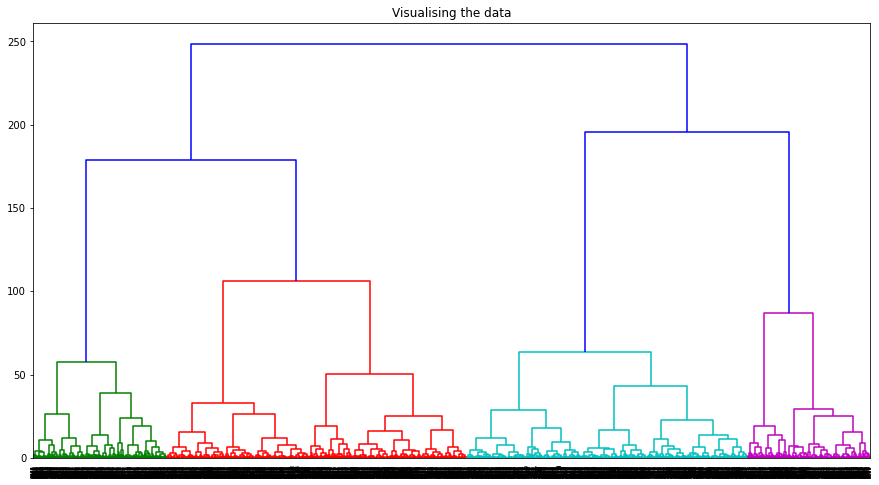

In [ ]:
#Visualizing the working of the Dendograms

plt.figure(figsize =(15, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

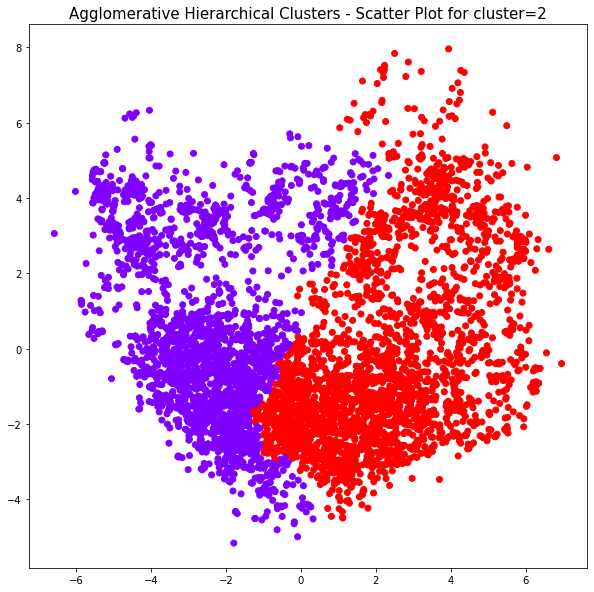

In [ ]:
#Building and Visualizing the different clustering models for 
#different values of k
# k=2
ac2 = AgglomerativeClustering(n_clusters = 2)
  
plt.figure(figsize =(10, 10))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot for cluster=2", fontsize=15)
plt.show()

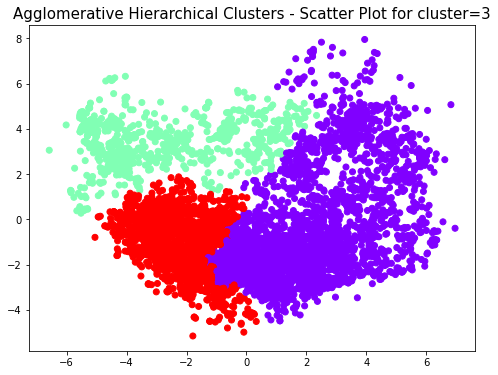

In [ ]:
#k=3
ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(8, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot for cluster=3", fontsize=15)
plt.show()

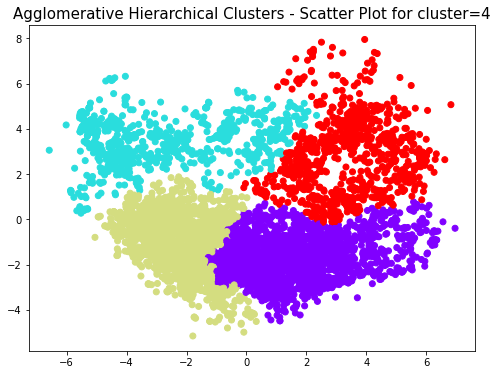

In [ ]:
# k =4
ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(8, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot for cluster=4", fontsize=15)
plt.show()
#ac4.describe(include='all').loc['mean'] < 1
#ac4.corr() ## Heat map to be generated

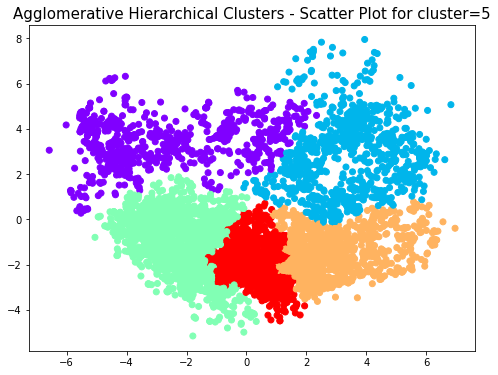

In [ ]:
#k=5
ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(8, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot for cluster=5", fontsize=15)
plt.show()

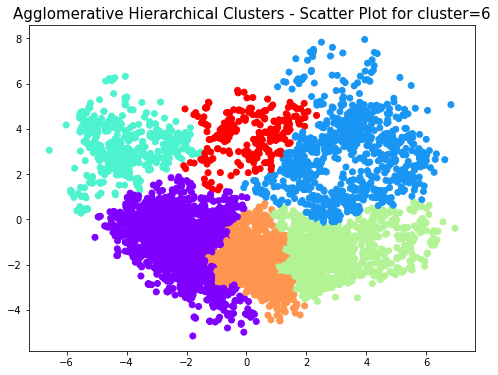

In [ ]:
k=6
ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(8, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot for cluster=6", fontsize=15)
plt.show()
#print(ac6)

In [ ]:
#with PCA finding silhouette_score and calinski_harabasz_score
#after feature englineering
#clus=[ac2, ac3, ac4, ac5, ac6]
import time
k=[2,3,4,5,6];
d2=X_principal
for i in k:
  print("k=",i)
  X_principal=d2
  start_time = time.time()
  model=AgglomerativeClustering(i)
  yhat = model.fit(X_principal)
  print("Agglomerative Execution Time: %s seconds" % (time.time() - start_time))
  print("Agglomerative silhouette_score: ", silhouette_score(X_principal, model.fit_predict(X_principal)))
  #calinski_harabasz_score code 
  #yhat = i.fit(d2)
  X_principal['Labels'] = yhat.labels_
  print("Agglomerative - calinski_harabasz_score : %0.3f" %metrics.calinski_harabasz_score(X_principal.iloc[:,:-1], X_principal['Labels']))


k= 2
Agglomerative Execution Time: 0.8346521854400635 seconds
Agglomerative silhouette_score:  0.3721833546628593
Agglomerative - calinski_harabasz_score : 3387.374
k= 3
Agglomerative Execution Time: 0.798637866973877 seconds
Agglomerative silhouette_score:  0.3928664121522676
Agglomerative - calinski_harabasz_score : 4105.526
k= 4
Agglomerative Execution Time: 0.8063807487487793 seconds
Agglomerative silhouette_score:  0.42327565815517537
Agglomerative - calinski_harabasz_score : 4951.577
k= 5
Agglomerative Execution Time: 0.8310372829437256 seconds
Agglomerative silhouette_score:  0.37815936495507596
Agglomerative - calinski_harabasz_score : 4837.523
k= 6
Agglomerative Execution Time: 0.8188838958740234 seconds
Agglomerative silhouette_score:  0.47525989151478193
Agglomerative - calinski_harabasz_score : 4683.217


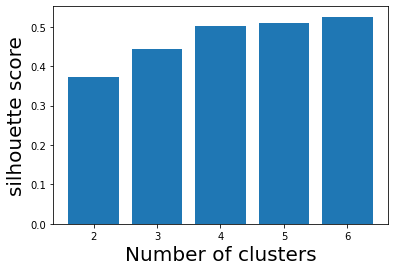

In [ ]:
#Evaluating the different models and Visualizing the results.
k = [2, 3, 4, 5, 6]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('silhouette score', fontsize = 20)
plt.show()

#it is concluded that the optimal number of clusters for the given data and clustering technique is 4

In [ ]:
#ac4 = AgglomerativeClustering(n_clusters = 4)
#cluster_labels=ac4.fit_predict(X_principal)
#ac4 = data[data['cluster_labels']==4]
#ac4.describe(include='all').loc['mean'] < 1
data.describe(include='all').loc['mean'] < 1

Category 1     False
Category 2     False
Category 3     False
Category 4     False
Category 5     False
Category 6     False
Category 7     False
Category 8     False
Category 9     False
Category 10    False
Category 11    False
Category 12    False
Category 13    False
Category 14    False
Category 15    False
Category 16    False
Category 17     True
Category 18     True
Category 19     True
Category 20    False
Category 21     True
Category 22    False
Category 23    False
Category 24    False
Name: mean, dtype: bool